In [1]:
import sys
sys.path.append("./source")
import bier
from lmmNet import *
import train_onestep
import predict_onestep

import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt
import timeit

# 1. Stable Fixed Point

TODO: generate multiple strains of S. cerevisiae. The strategy is to create multiple dataframes with `create_data(...)` from `utils` and concatenate them afterwards.

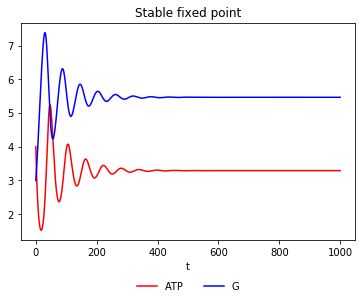

In [8]:
time_points, bier_data1 = bier.simulate_custom()

plt.plot(time_points, bier_data1[:,0], 'r-', label='ATP')
plt.plot(time_points, bier_data1[:,1], 'b-', label='G')
plt.xlabel('t')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.title('Stable fixed point')
plt.show()

In [9]:
# function to prepare data for training one-step method
from utils import *

feature_list = [] # here we do not have external time-series or control variables
target_list = ['ATP', 'Glucose']

# now generate and augment the training dataset
df1 = create_data_numpy(bier_data1, time_points, cols=target_list)

# create another training strain and one test strain
time_points, bier_test = bier.simulate_custom(x0 = [3, 6])
time_points, bier_data2 = bier.simulate_custom(x0 = [2,1])

df2 = create_data_numpy(bier_data2, time_points, cols=target_list, num=1)
test_df = create_data_numpy(bier_test, time_points, cols=target_list)
df = pd.concat([df1, df2])

Shape of the dataframe is: (5000, 3)
Shape of the dataframe is: (5000, 3)
Shape of the dataframe is: (5000, 3)


ATP


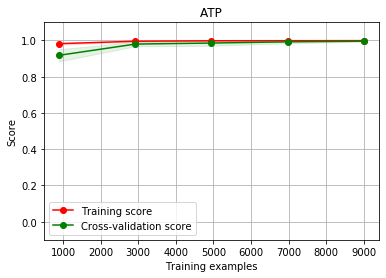

Target: ATP, CV Pearson R2 coefficient: 0.999419
Glucose


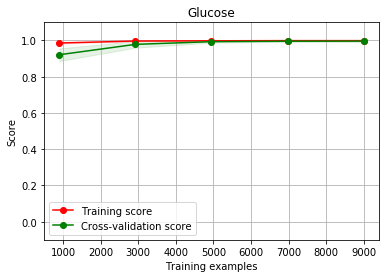

Target: Glucose, CV Pearson R2 coefficient: 0.999253
Average training score: 0.9993360247634722
ATP RMSE: -8.005664763361071e-05 standard deviation: 0.0018253619382587755


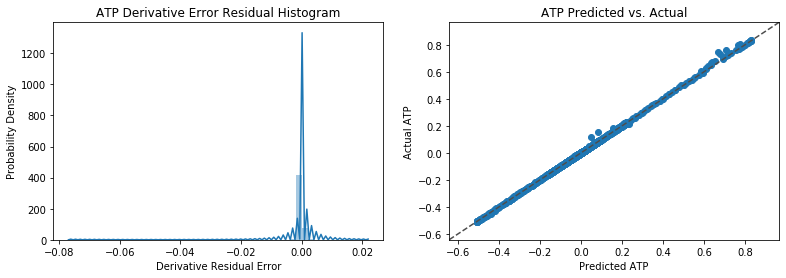

Glucose RMSE: 7.299596186725935e-05 standard deviation: 0.0018962724416243231


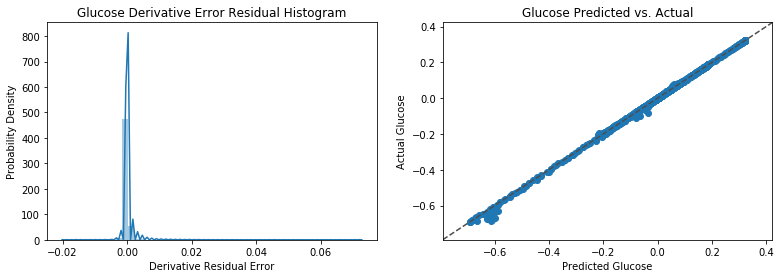

Total Derivative Mean Error: 0.012067895547533533 Error Standard Deviation: 0.013380573671431254


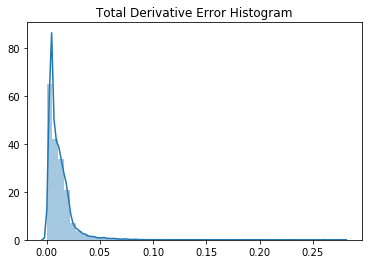

Real data:


,ATP,Glucose
Strain,,
0,3.000000,6.000000
0,3.010724,5.999872
0,3.021561,5.999488
0,3.032506,5.998850
0,3.043554,5.997956
...,...,...
0,3.292683,5.466668
0,3.292683,5.466668
0,3.292683,5.466668


Predicted data:


,ATP,Glucose
Time,,
0.0,3.000000,6.000000
0.2,3.014584,5.999621
0.4,3.029508,5.998742
0.6,3.044805,5.997292
0.8,3.060599,5.994739
...,...,...
999.0,3.287510,5.470521
999.2,3.287538,5.470540
999.4,3.287566,5.470558


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: ATP 0.7600245389549479 RMSE percentage: 6.214099333434999
ML Fit: Glucose 0.6599026187508071 RMSE percentage: 4.493633816568667
ML model aggregate error
Average RMSE: 0.7099635788528775
Total percentage error: 5.353866575001833


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


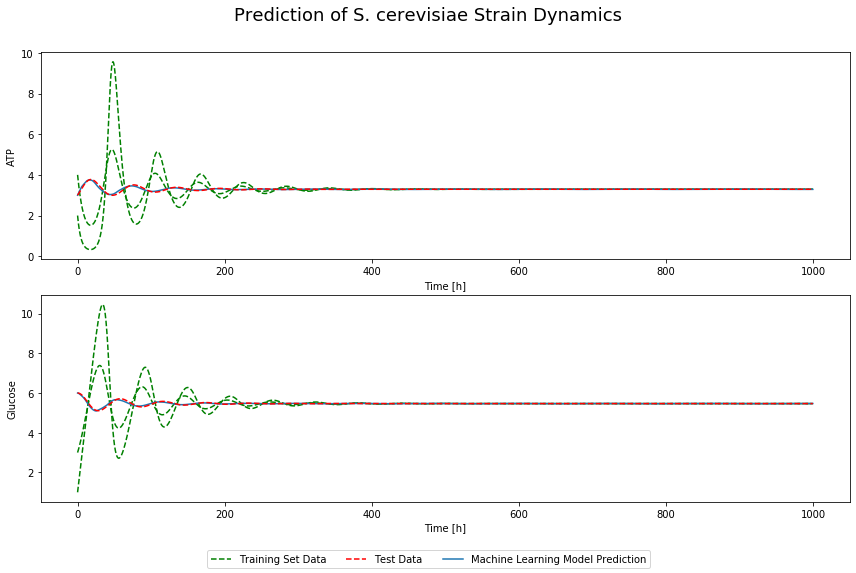

In [10]:
df_train = train_onestep.generate_dataset(df, [0, 1],feature_list, target_list, n_dim=5000)
tp, pred = end_to_end_training(df, df_train, test_df, feature_list, target_list, (2,1), title='S. cerevisiae')

# 2. Stable limit cycle

Now let's try to solve the oscillating problem. Make sure to import the necessary libraries.

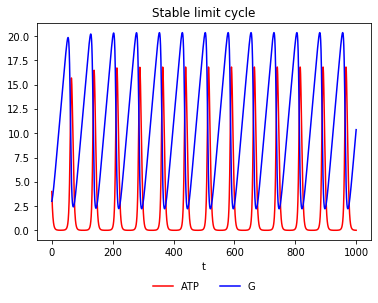

In [34]:
import math

time_points, bier_data = bier.simulate_default()

plt.plot(time_points, bier_data[:,0], 'r-', label='ATP')
plt.plot(time_points, bier_data[:,1], 'b-', label='G')
plt.xlabel('t')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.title('Stable limit cycle')
plt.show()

Shape of the dataframe is: (5000, 3)
Shape of the dataframe is: (9980, 3)
ATP


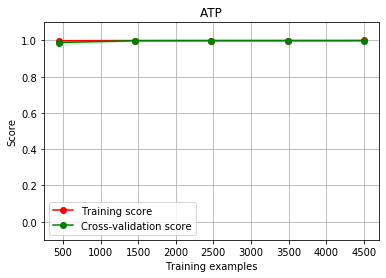

Target: ATP, CV Pearson R2 coefficient: 0.999920
Glucose


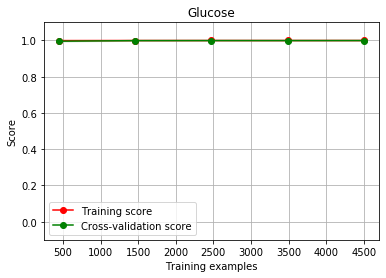

Target: Glucose, CV Pearson R2 coefficient: 0.999948
Average training score: 0.9999337400163365
ATP RMSE: 0.0003790934794478896 standard deviation: 0.00740091564434725


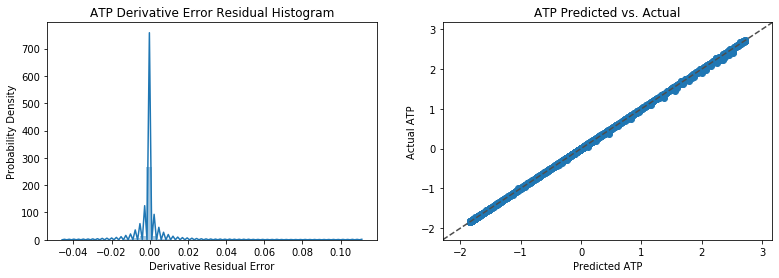

Glucose RMSE: -0.00022287605683361483 standard deviation: 0.005005311028184238


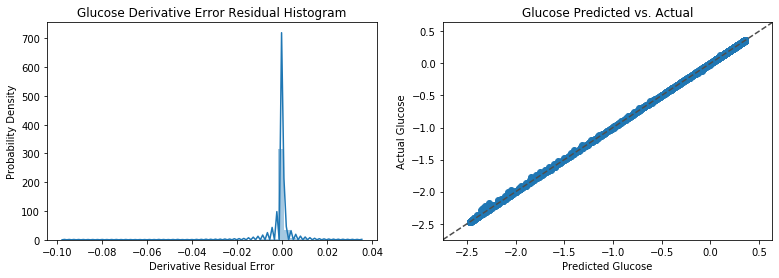

Total Derivative Mean Error: 0.02279935782081679 Error Standard Deviation: 0.034819937335946356


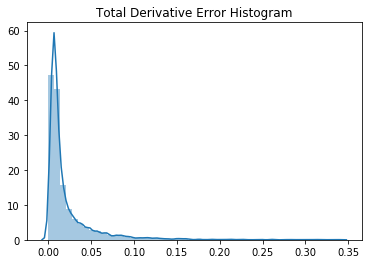

Real data:


,ATP,Glucose
Strain,,
0,2.000000,1.000000
0,1.923672,1.032014
0,1.850066,1.064060
0,1.779101,1.096141
0,1.710702,1.128261
...,...,...
0,0.200559,5.223896
0,0.194977,5.257824
0,0.189572,5.291795


Predicted data:


,ATP,Glucose
Time,,
0.0,2.000000,1.000000
0.1,1.937954,1.024215
0.2,1.877690,1.048623
0.3,1.818822,1.073299
0.4,1.761760,1.098207
...,...,...
997.5,0.515869,20.230925
997.6,0.533227,20.245667
997.7,0.551209,20.259718


./source/predict_onestep.py:217: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmse = math.sqrt(quad(integrand,min(times),max(times),limit=200)[0])
./source/predict_onestep.py:222: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: ATP 244.55959057257525 RMSE percentage: 1251.8920652574027


./source/predict_onestep.py:222: IntegrationWarning: The maximum number of subdivisions (200) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rmsep = math.sqrt(quad(percent_integrand,min(times),max(times),limit=200)[0])


ML Fit: Glucose 338.11410286979867 RMSE percentage: 132.17614326287165
ML model aggregate error
Average RMSE: 291.33684672118693
Total percentage error: 692.0341042601372


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


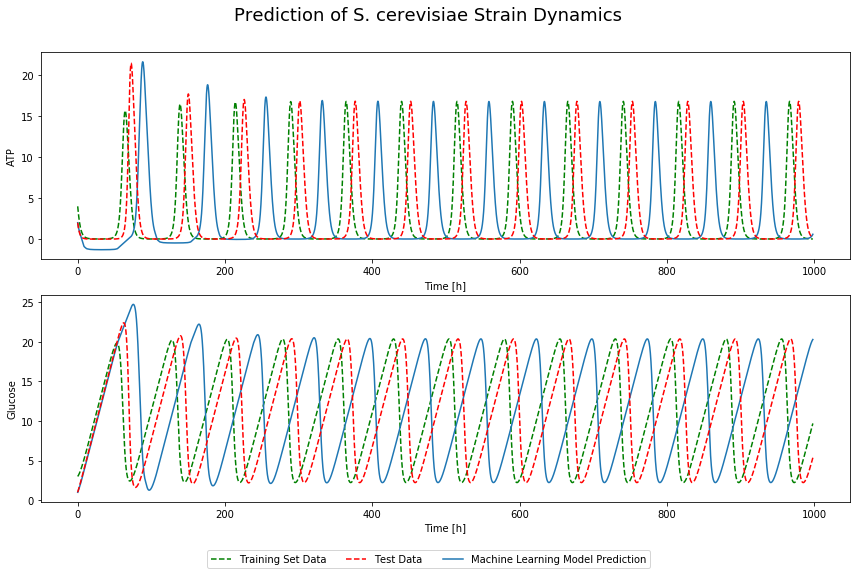

In [35]:
# function to prepare data for training one-step method
#h = 0.1
#NUMBER_POINTS = math.ceil(1000/h)

# now generate and augment the training dataset
df = create_data_numpy(bier_data, time_points, cols=target_list)
df_train = train_onestep.generate_dataset(df, [0],feature_list, target_list, n_dim=5000)

# create a test data
time_points, bier_test = bier.simulate_custom(x0 = [2,1],h = 0.1, T=998, params={'Vin': 0.36, 'k1': 0.02, 'kp':6, 'km':12})
test_df = create_data_numpy(bier_test, time_points, cols=target_list)

tp, pred = end_to_end_training(df, df_train, test_df, feature_list, target_list, (2,1), title='S. cerevisiae')

Text(0.5, 1.0, 'Phase plane of 2D Yeast Glycolytic Oscillator')

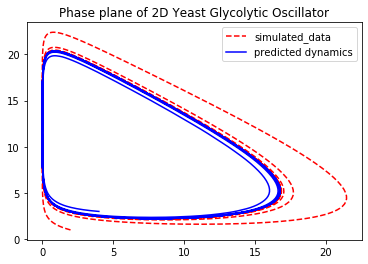

In [14]:
# Phase plane

plt.plot(bier_test[:,0], bier_test[:,1], 'r--', label='simulated_data')
plt.legend()
plt.plot(pred['ATP'], pred['Glucose'], 'b-', label='predicted dynamics')
plt.legend()
plt.title('Phase plane of 2D Yeast Glycolytic Oscillator')

# 3. LmmNet

Interestingly, just 1 strain is enough for LmmNet to perform well on the test data.

In [ ]:
time_points, bier_data = bier.simulate_default()

plt.plot(time_points, bier_data1[:,0], 'r-', label='ATP')
plt.plot(time_points, bier_data1[:,1], 'b-', label='G')
plt.xlabel('t')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, frameon=False)
plt.title('Stable fixed point')
plt.show()

In [ ]:
import train_lmmNet
import predict_lmmNet

model = train_lmmNet.train_easy(time_points, bier_data)
_, test_data = bier.simulate_custom(x0 = [2,1])
predicted_test = odeint(lambda x, t: predict_lmmNet.predict_fn(x, t, model), test_data[0,0,:], time_points)

In [ ]:
plt.figure(figsize=(20, 10))
plt.suptitle("LmmNet Prediction on the test data for Yeast Glycolysis", fontsize=22)

# plot the dynamics with time
for species in range(2):
    plt.subplot(2, 1, species + 1)
    plt.plot(time_points, bier_data[:,species], 'g--', label='training data')
    plt.plot(time_points, test_data[:,species], 'r--', label='test data')
    plt.plot(time_points, predicted_test[:,species], 'b-', label='predicted dynamics')
    plt.xlabel('t')
    plt.ylabel('species_' + str(species))

plt.legend(loc='center', bbox_to_anchor=(0.5, 3.5), ncol=2, fontsize=12, frameon=False)
plt.show()

# 4. Results

The performance on 2-D Harmonic oscillator is taken from [MultiStep Neural Network](https://maziarraissi.github.io/research/7_multistep_neural_networks/).

In [10]:
# first component MSE
harmonic1_ab = [1.5, 0.031, 0.12, 0.043, 0.012]
harmonic1_am = [0.0088, 0.012, 0.016, 0.0063, 0.011]
harmonic1_bdf = [1.3, 0.0088, 0.013, 0.014, 0.017]

# second component MSE
harmonic2_ab = [1.5, 0.03, 0.097, 0.035, 0.012]
harmonic2_am = [0.0083, 0.01, 0.016, 0.0058, 0.011]
harmonic2_bdf = [1.3, 0.0086, 0.0099, 0.014, 0.015]

In [27]:
def compute_MSE(pred, data, index):
    pred_array = np.array(pred)
    data = np.squeeze(data)
    return np.linalg.norm(data[:,index] - pred_array[:,index], 2)/np.linalg.norm(data[:,index], 2)

Next we compute the MSE from the 2-D Yeast Glycolytic Oscillator results.

In [28]:
# first component
glycolytic1_ab = [compute_MSE(result_dict['AB'+str(i)+'pred'], bier_data, 0) for i in range(1, 6)]
glycolytic1_am = [compute_MSE(result_dict['AM'+str(i)+'pred'], bier_data, 0) for i in range(1, 6)]
glycolytic1_bdf = [compute_MSE(result_dict['BDF'+str(i)+'pred'], bier_data, 0) for i in range(1, 6)]

# second component
glycolytic2_ab = [compute_MSE(result_dict['AB'+str(i)+'pred'], bier_data, 1) for i in range(1, 6)]
glycolytic2_am = [compute_MSE(result_dict['AM'+str(i)+'pred'], bier_data, 1) for i in range(1, 6)]
glycolytic2_bdf = [compute_MSE(result_dict['BDF'+str(i)+'pred'], bier_data, 1) for i in range(1, 6)]

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


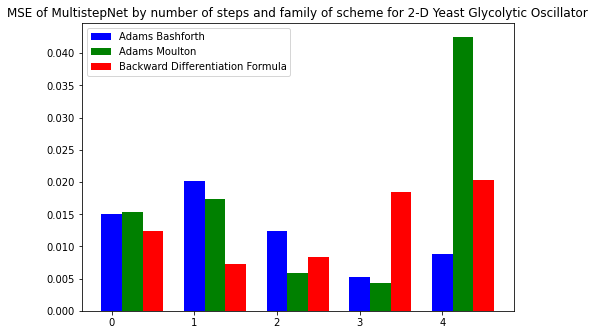

In [44]:
data = [glycolytic1_ab, glycolytic1_am, glycolytic1_bdf]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MSE of MultistepNet by number of steps and family of scheme for 2-D Yeast Glycolytic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])

plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


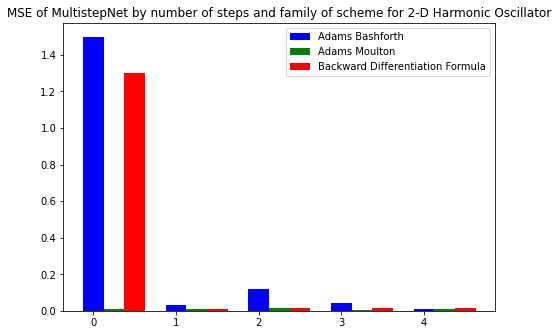

In [43]:
data = [harmonic1_ab, harmonic1_am, harmonic1_bdf]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MSE of MultistepNet by number of steps and family of scheme for 2-D Harmonic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])
plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


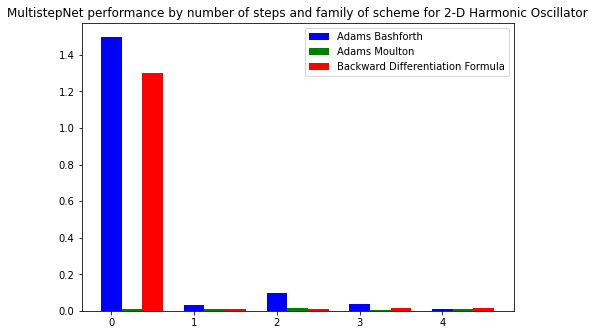

In [41]:
data = [harmonic2_ab, harmonic2_am, harmonic2_bdf]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MultistepNet performance by number of steps and family of scheme for 2-D Harmonic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])
plt.show()

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:9: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.


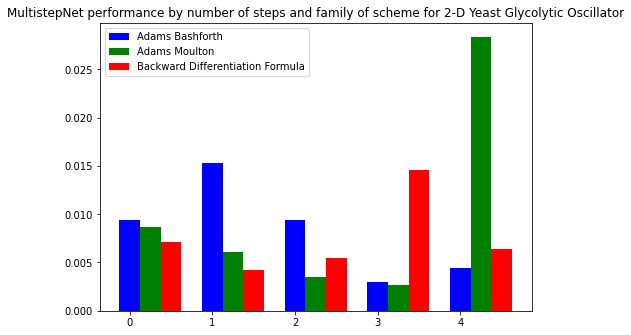

In [42]:
data = [glycolytic2_ab, glycolytic2_am, glycolytic2_bdf]
X = np.arange(5)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(X + 0.25, data[1], color = 'g', width = 0.25)
ax.bar(X + 0.50, data[2], color = 'r', width = 0.25)

ax.set_xticks(X, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_title('MultistepNet performance by number of steps and family of scheme for 2-D Yeast Glycolytic Oscillator')
ax.legend(labels=['Adams Bashforth', 'Adams Moulton', 'Backward Differentiation Formula'])

plt.show()

# 5. Discovering Bifurcations

A major test for the multistep neural network is to also discover bifurcation from the data. To do this, the 2-D system can be rewritten in a 3-D system of equations with the parameter space as the extra dimension.

In [ ]:
def bier3D(x,t, params=None):
    """
    2-D Yeast Glycolytic oscillator model with an extra parameter dimension
    
    Args:
        x -- a 3 x 1 vector of measurements
        t -- time, ignored
        
    Return:
        A numpy array containing the derivatives
    """
    if params == None:
        # default parameter values
        #Vin = 0.36
        k1 = 0.02
        kp = 6
        km = 12
    else:
        #Vin = params['Vin']
        k1 = params['k1']
        kp = params['kp']
        km = params['km']
    
    Vin = x[0] # constant
    
    r0 = 0
    r1 = 2 * k1 * x[1] * x[2] - kp * x[1]/(x[1] + km) # ATP
    r2 = Vin - k1 * x[1] * x[2] #G
    
    return np.ravel(np.array([r0, r1, r2]))

In [ ]:
plt.plot(data[0, :,0], data[0, :,1], label='simulated_data')
plt.xlabel('ATP')
plt.ylabel('Glucose')
plt.title('Phase plane of 2D Yeast Glycolytic Oscillator')

In [ ]:
# specify the settings for the bier data

t0, T, h = 0, 500, 0.2 #seconds
x0 = np.array([4, 3]) #initial conditions: ATP = 4, G = 3 -- default Bier model for training
f_bier = lambda x, t: bier(x, t)
time_points, o_data = create_training_data(t0, T, h, f_bier, x0)
plt.plot(o_data[0, :,0], o_data[0, :,1], label='simulated_data')
plt.xlabel('ATP')
plt.ylabel('Glucose')
plt.title('Phase plane of 2D Yeast Glycolytic Oscillator')

In [ ]:
# specify the settings for the bier data

x0 = np.array([[0.4, 4, 3],
               [1.1, 4, 3],
              [0.5, 4, 3],
              [0.7, 4, 3],
               [0.8, 4,3],
               [0.9, 4, 3],
               [1.0, 4, 3],
               [1.2, 4, 3],
               [1.0, 2, 1],
               [0.8, 2, 1],
               [0.7, 2, 1],
               [1.2, 2, 1],
               
               [1.5, 4,3],
              [1.6, 4,3],
              [1.7, 4, 3]])


params = {'k1': 0.02, 'kp':4, 'km':15} # damped oscillation
f_bier3D = lambda x, t: bier3D(x, t, params)

In [ ]:
S = x0.shape[0] # number of trajectories
N = time_points.shape[0] # number of time points (i.e. the grid size)
D = x0.shape[1] # number of dimensions/species
noise_strength = 0

hopf_data = np.zeros((S, N, D))
for k in range(0, S):
    hopf_data[k,:,:] = odeint(f_bier3D, x0[k,:], time_points)

In [ ]:
# inference

y0 = np.array([[0.6,2,1],
                   [0.1,2,1],

                   [0.2,4,3],
                   [0.3,4,3],
                   [0.54,4,3],
                   [0.35,4,3],
                   [.45,4,3],
                   [.55,4,3],

                   [.1,4,3],
                   [.2,2,1],
                   [.3,2,1],
                   [.4,2,1],
                   [.5,2,1],
                   [.6,4,3],

                   [1.55,4,3],

                   [1.45,4,3],
                   [1.65,2,1],
                   [1.60,2,3],
                   [1.55,2,3],
                   [1.70,2,3],
                   [1.55,2,3],

                   [0.2,2,3],
                   [0.1,2,3]])
    
    
hopf_pred = np.zeros((y0.shape[0], time_points.shape[0], y0.shape[1]))

for k in range(0, y0.shape[0]):
    hopf_pred[k,:] = odeint(predict_fn, y0[k,:], time_points, args=(net1,))